In [1]:
'''Prediction of activities for the given CDR
Help taken from: https://www.guru99.com/rnn-tutorial.html#2
Extra help
https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/'''
'''However, this code is made by myself for practice'''

import numpy as np
import tensorflow as tf
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error 

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
 

## Calling and preprocessing the raw data

In [2]:
# Load files and make the data set
dataset = pd.read_csv('Filtered_Grid_01.txt')
Internet_activity = dataset['Internet_Activity']
series = Internet_activity.values
series = series.reshape([len(series), 1])

#Data split
size_train_main = int(np.floor(len(series)*.8))
size_val_main = int((len(series) - size_train_main)/2)
size_test_main = int((len(series) - size_train_main)/2)

print("train, valid, test : ", size_train_main,size_val_main,size_test_main)
print("sum : ", size_train_main+size_val_main+size_test_main)

## Split data
train_set_main = series[:size_train_main]
valid_set_main = series[size_train_main:-size_val_main]
test_set_main = series[size_train_main+size_val_main:]
 
# print("\n")
print("train shape =", train_set_main.shape)
print("valid shape =", valid_set_main.shape)
print("test shape =", test_set_main.shape)

train, valid, test :  4464 558 558
sum :  5580
train shape = (4464, 1)
valid shape = (558, 1)
test shape = (558, 1)


## Preparing the data

In [3]:
# Make x and y labels for time series
X_train = pd.DataFrame(train_set_main)
y_train = X_train.shift(-1)

X_val = pd.DataFrame(valid_set_main)
y_val = X_val.shift(-1)

X_test = pd.DataFrame(test_set_main)
y_test = X_test.shift(-1)

X_train.drop(X_train.tail(1), inplace = True)
X_val.drop(X_test.tail(1), inplace = True)
X_test.drop(X_test.tail(1), inplace = True)

y_train.dropna(inplace = True)
y_val.dropna(inplace = True)
y_test.dropna(inplace = True)

# Concatenate X,Y values for reference, if needed
train_ = pd.concat([X_train, y_train], axis = 1)
val_ = pd.concat([X_val, y_val], axis = 1)
test_ = pd.concat([X_test, y_test], axis = 1)

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values
X_test = X_test.values 

# Making a feed forward model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


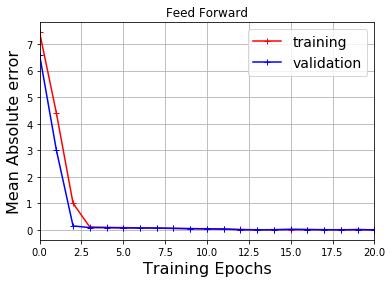

In [4]:
model_FF = Sequential()
model_FF.add(Dense(10, activation='relu'))
model_FF.add(Dense(1)) 

model_FF.compile(loss='mean_absolute_error', optimizer = 'adam')
 
history_FF = model_FF.fit(X_train, y_train, epochs=100, batch_size=64, \
                          validation_data=(X_val, y_val), verbose=0, shuffle=False)

# Visualize the model
print(model_FF.summary())
 
    
# Plotting the error in training and validation
plt.plot(history_FF.history['loss'], "b+-", label='training', color = "red")
plt.plot(history_FF.history['val_loss'], "b+-", label='validation', color = "blue")
plt.legend(fontsize=14) 
plt.title('Feed Forward')
plt.grid()
plt.xlabel('Training Epochs', fontsize=16)
plt.ylabel('Mean Absolute error', fontsize=16)
plt.xlim(0, 20)
plt.show()

# Prediction of future cellular traffic

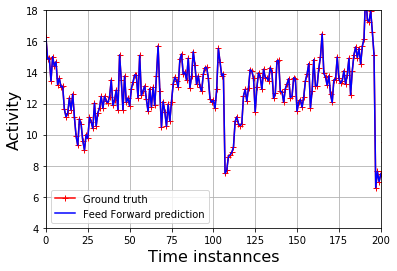

In [5]:
# Predicting the future traffic using .predict()
y_pred_FF = model_FF.predict(X_test.reshape(X_test.shape[0],1))

plt.plot(y_test, "b-+", label='Ground truth', color = "red")
plt.plot(y_pred_FF, "b-", label='Feed Forward prediction', color = "blue")
plt.legend()
plt.ylim(4,18)
plt.xlim(0, 200)
plt.xlabel('Time instannces', fontsize=16)
plt.ylabel('Activity', fontsize=16)
plt.grid()
plt.show()